In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df_out=pd.read_csv('out_395.csv', sep=',',header=0)
df_no_minus = df_out


In [2]:
df_no_minus.head()

,# No,Tanggal,Penyebab,Akibat,Lokasi 1,Lokasi 2,Andil,No Kereta,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3
0,1,2019-02-02 00:00:00,ANTRIAN TIKET,LAMBAT DI STASIUN AWAL,Purwakarta,Purwakarta,25,395,2,2,5,5,25,25
1,2,2019-02-02 00:00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Sukatani,Plered,-5,395,2,2,5,5,20,25
2,3,2019-02-02 00:00:00,TAKTIS MASINIS,MENGURANGI KELAMBATAN,Cisomang,Cikadongdong,-4,395,2,2,5,5,16,20
3,4,2019-02-02 00:00:00,TAKTIS PPKA,MENGURANGI KELAMBATAN,Cikadongdong,Cikadongdong,-4,395,2,2,5,5,12,16
4,5,2019-02-02 00:00:00,PEMASANGAN TASPAT (PRASARANA),PEMASANGAN TASPAT,Cikadongdong,Rendeh,1,395,2,2,5,5,13,12


In [3]:
j=0
while (j < len(df_no_minus)):
    if(df_no_minus.Andil[j] < 0):
        df_no_minus.drop([j], axis=0, inplace=True)
    j+=1

In [4]:
from sklearn.preprocessing import OrdinalEncoder
train_cat = df_out[['Lokasi 2']]
ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]
df_out['Encoded_Lokasi_2'] = train_cat_encoded

In [5]:
df_no_minus.describe()

,# No,Andil,No Kereta,Bulan Ke,Hari Ke,Nama Hari,Minggu Ke,Andil2,Andil3,Encoded_Lokasi_2
count,286.000000,286.000000,286.0,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,187.472028,4.419580,395.0,2.538462,13.856643,3.076923,9.122378,12.604895,8.653846,6.863636
std,102.522009,7.671238,0.0,0.499392,7.910269,2.109550,2.343125,12.866978,10.758062,5.196383
min,1.000000,-25.000000,395.0,2.000000,2.000000,0.000000,5.000000,-2.000000,-4.000000,0.000000
25%,101.250000,1.000000,395.0,2.000000,7.000000,1.000000,7.000000,4.000000,2.000000,2.000000
50%,184.500000,2.000000,395.0,3.000000,14.000000,3.000000,9.000000,8.000000,5.000000,5.000000
75%,282.750000,6.000000,395.0,3.000000,19.000000,5.000000,11.000000,18.000000,11.000000,12.000000
max,354.000000,41.000000,395.0,3.000000,31.000000,6.000000,13.000000,71.000000,69.000000,17.000000


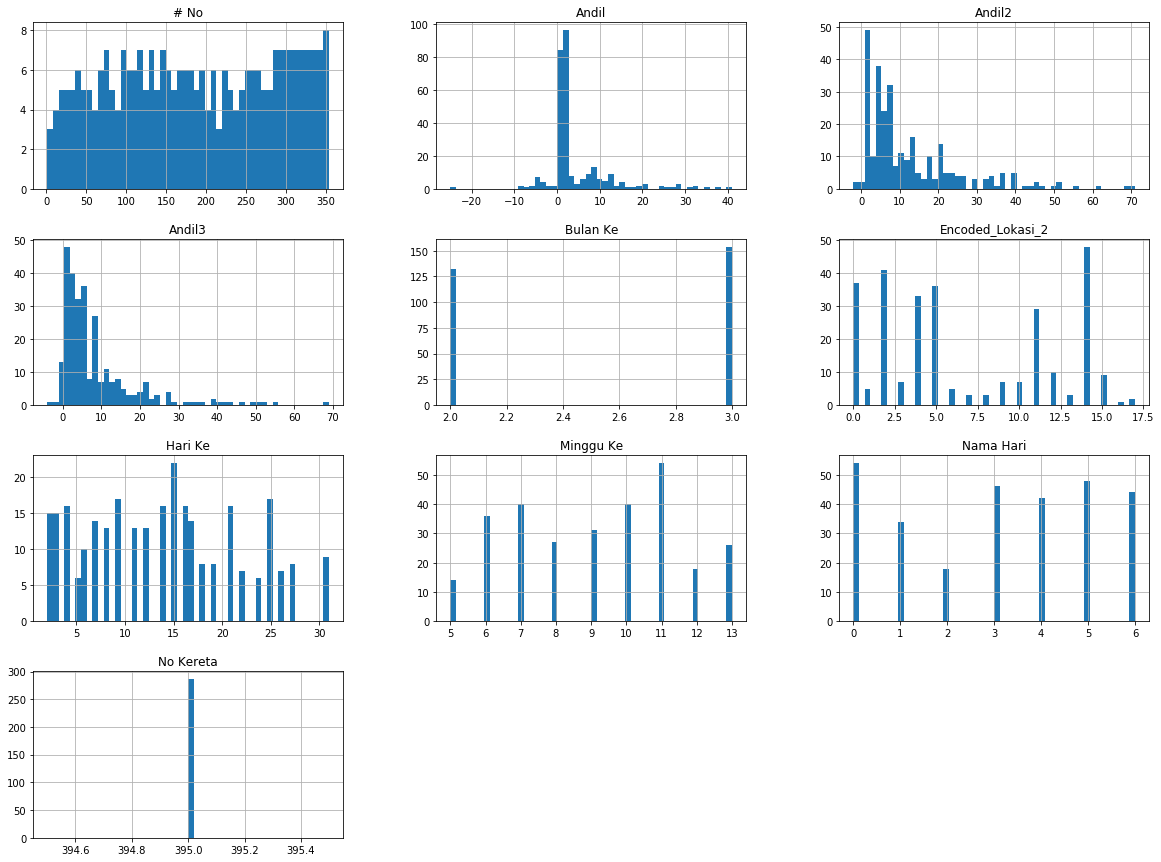

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df_no_minus.hist(bins=50, figsize=(20,15))
plt.show()

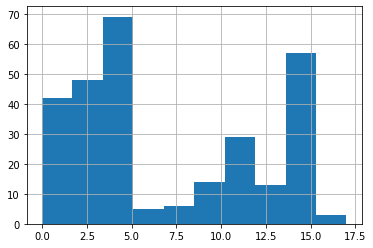

In [7]:
df_no_minus["Encoded_Lokasi_2"].hist()


In [8]:
df_no_minus["Encoded_Lokasi_2"].value_counts()

14.0    48
2.0     41
0.0     37
5.0     36
4.0     33
11.0    29
12.0    10
15.0     9
9.0      7
3.0      7
10.0     7
1.0      5
6.0      5
8.0      3
7.0      3
13.0     3
17.0     2
16.0     1
Name: Encoded_Lokasi_2, dtype: int64

In [9]:
ordinal_encoder.categories_

[array(['Bandung', 'Cibatu', 'Cicalengka', 'Cikadongdong', 'Cikudapateuh',
        'Cilame', 'Cimekar', 'Gedebage', 'Haurpugur', 'Kiaracondong',
        'Leles', 'Maswati', 'Nagreg', 'Purwakarta', 'Rancaekek', 'Rendeh',
        'Sasaksaat', 'Sukatani'], dtype=object)]